c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number 


🔧 Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
✅ Tuned Accuracy on Test Set: 100.00%

📊 Grid Search Results (CV Accuracy):
     C Penalty  CV Accuracy
 0.100      l1     1.000000
 1.000      l1     1.000000
 1.000      l2     1.000000
10.000      l1     1.000000
10.000      l2     1.000000
 0.010      l1     0.997426
 0.100      l2     0.997426
 0.010      l2     0.994594
 0.001      l1     0.991903
 0.001      l2     0.987409


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


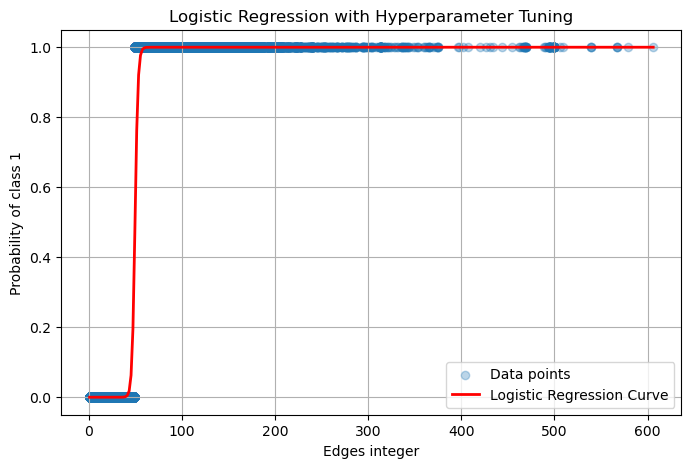

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load and preprocess data
df = pd.read_csv("dataset_MLproject.csv")
df['target_column'] = np.where(df['Edges integer'] < 50, 0, 1)
df = df.select_dtypes(include=[np.number])

# Feature and target
X = df[['Edges integer']]
y = df['target_column']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and hyperparameter grid
model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

# Grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("\n🔧 Best Parameters:", grid.best_params_)

# Evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Tuned Accuracy on Test Set: {accuracy * 100:.2f}%\n")

# Show accuracy for each parameter combo
print("📊 Grid Search Results (CV Accuracy):")
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df[['param_C', 'param_penalty', 'mean_test_score']]
results_df.columns = ['C', 'Penalty', 'CV Accuracy']
print(results_df.sort_values(by='CV Accuracy', ascending=False).to_string(index=False))

# Plot logistic regression curve
x_vals = np.linspace(X['Edges integer'].min(), X['Edges integer'].max(), 300).reshape(-1, 1)
y_probs = best_model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label='Data points')
plt.plot(x_vals, y_probs, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Edges integer')
plt.ylabel('Probability of class 1')
plt.title('Logistic Regression with Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()


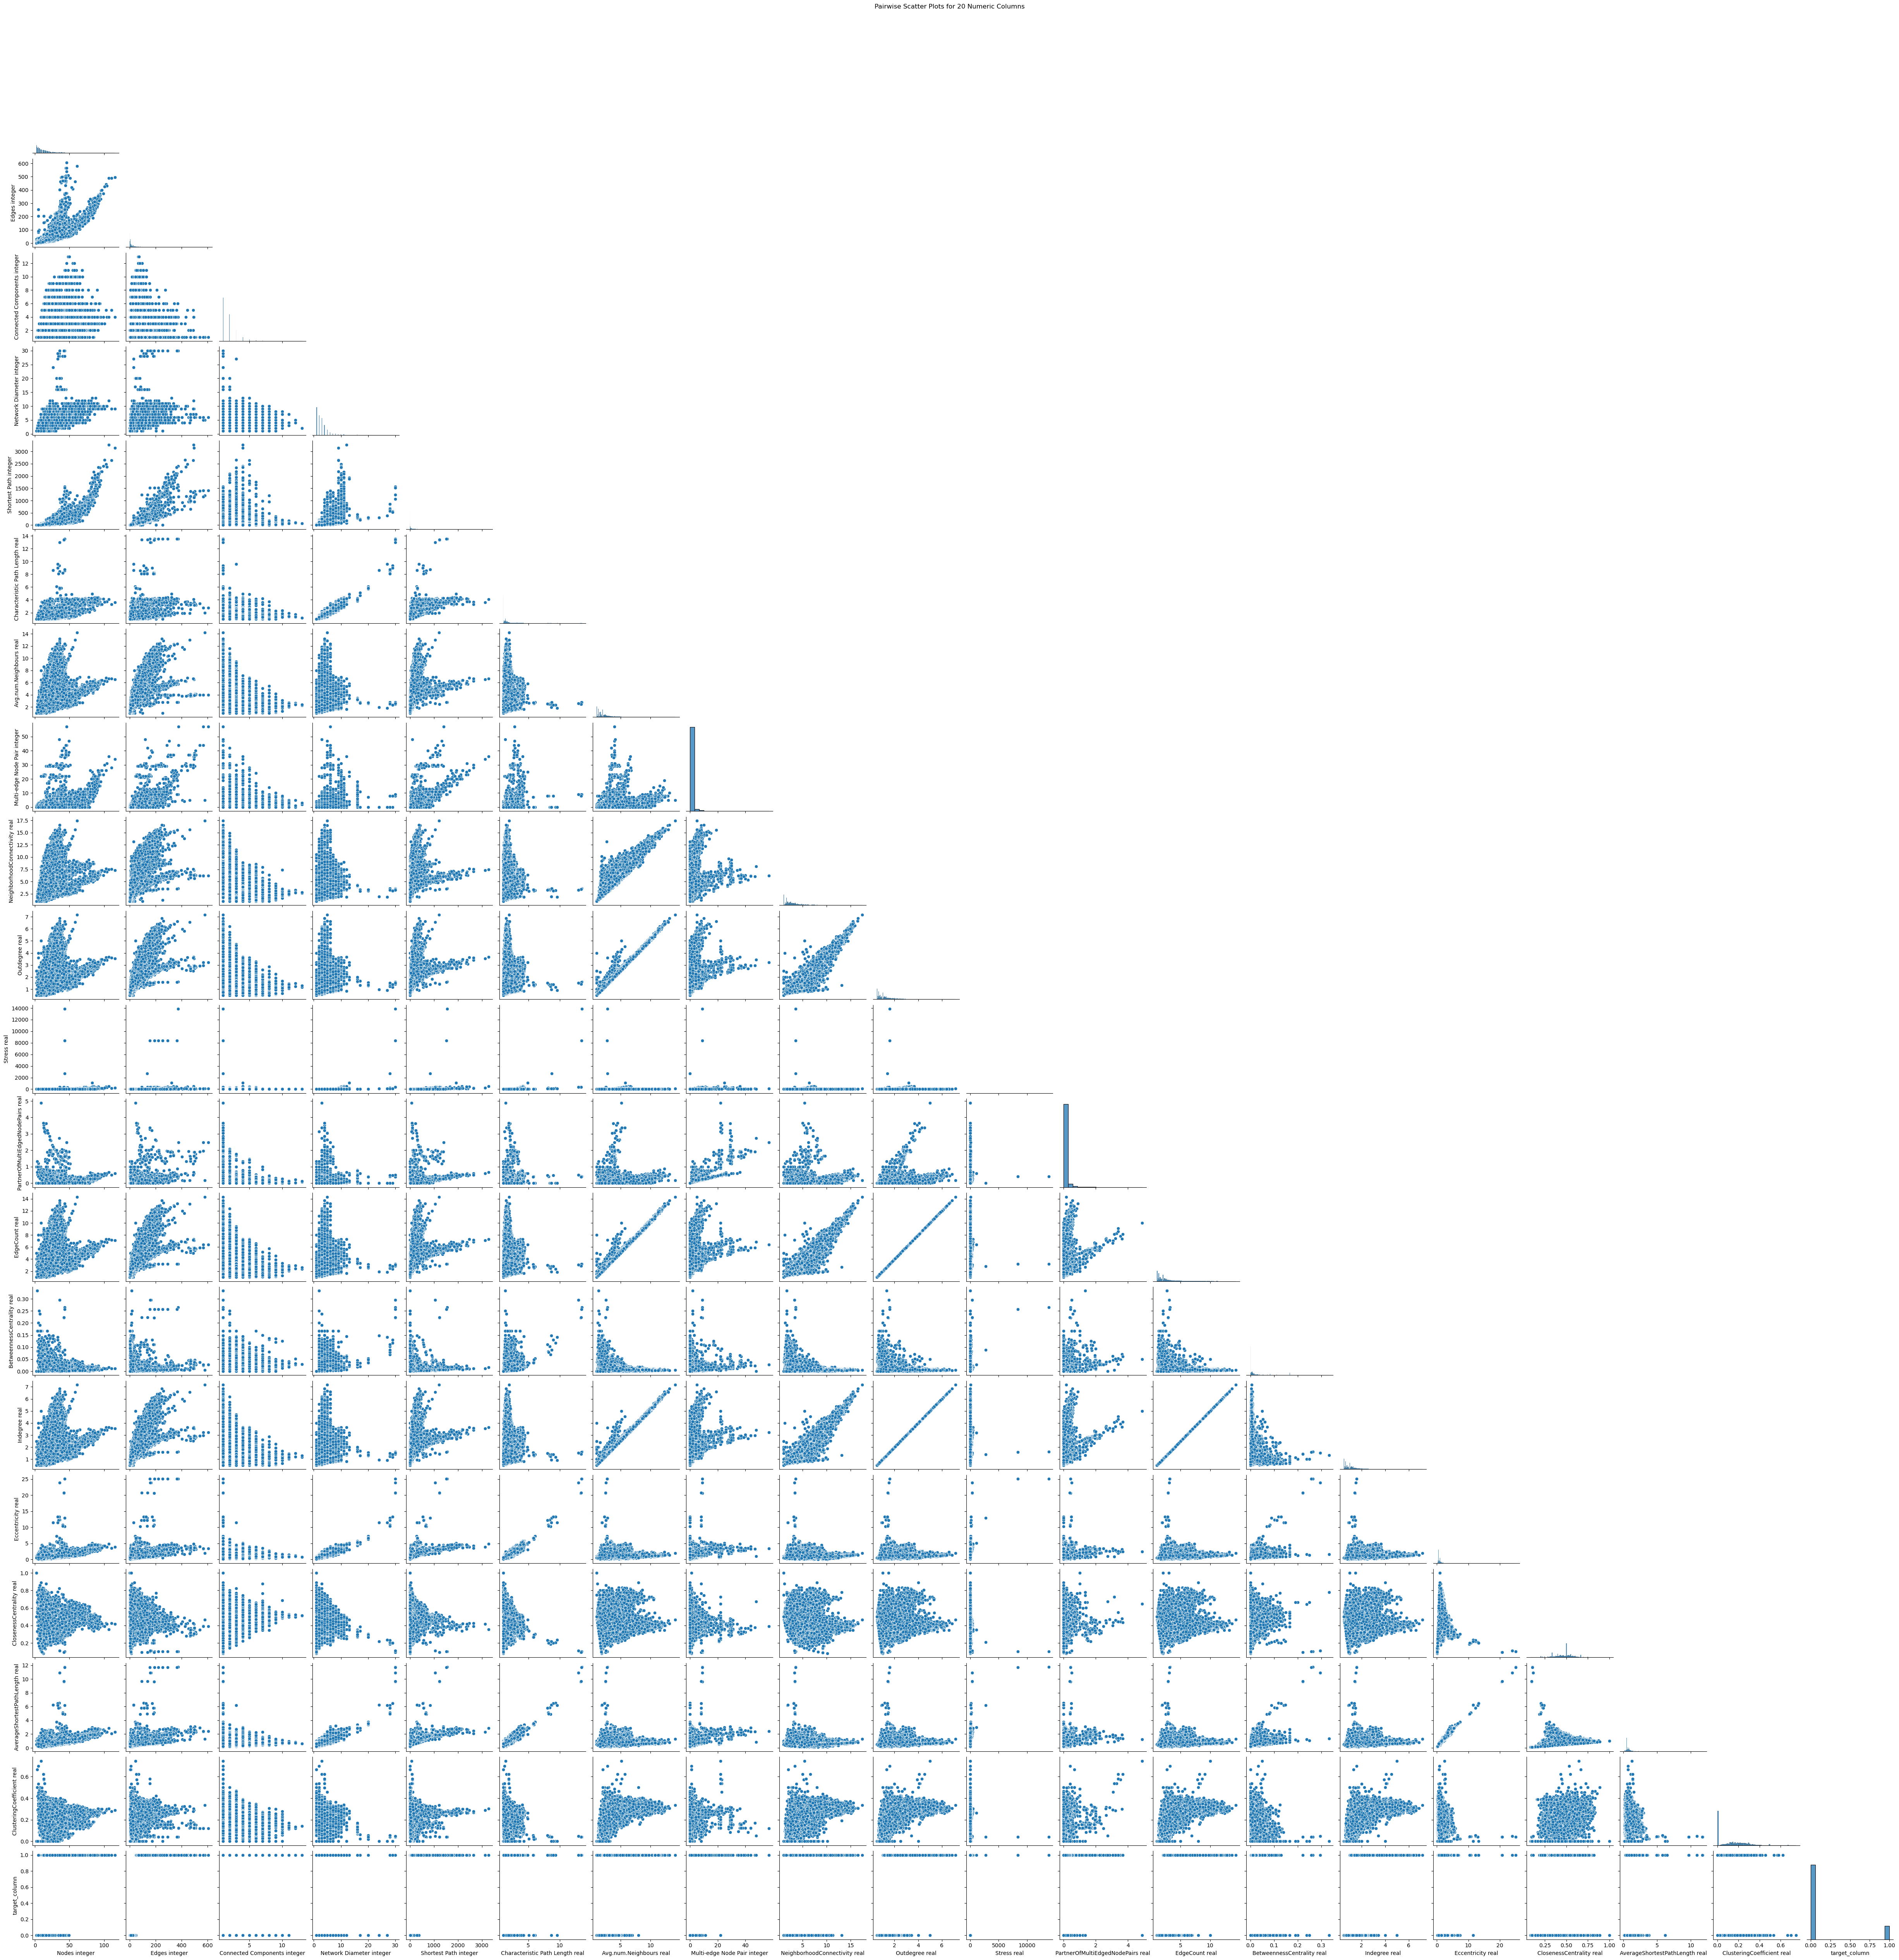

In [23]:
import seaborn as sns
numeric_df = df.select_dtypes(include='number').iloc[:, :20]
sns.pairplot(numeric_df, corner=True)  # corner=True hides upper triangle for clarity
plt.suptitle("Pairwise Scatter Plots for 20 Numeric Columns", y=1.02)
plt.show()

confusion matrix
[[9066    0]
 [   0 1617]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9066
           1       1.00      1.00      1.00      1617

    accuracy                           1.00     10683
   macro avg       1.00      1.00      1.00     10683
weighted avg       1.00      1.00      1.00     10683

 


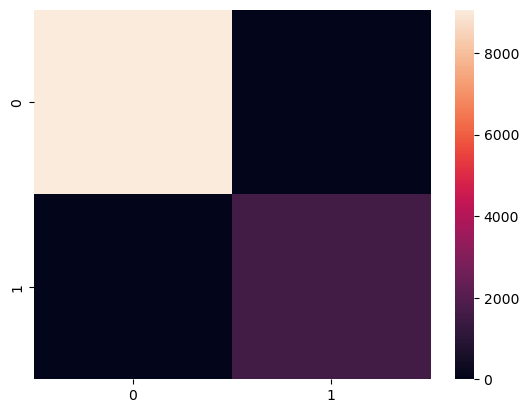

In [26]:
print("confusion matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(" ")